## 1 - Introduce the Data
Task: Given attributes about a women, predict whether she suffers from Urinary incontinence or not

In [55]:
# Import data and take a look
import numpy as np
import pandas as pd
df = pd.read_csv('data_set.csv', encoding='latin-1')

In [56]:
df.head(5)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_,FuitesUrinaires
0,22,Célibataire,Universitaire,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,0,Non fumeur,1
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0,0,0,0,0,0,1.0,1,Non fumeur,1
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0,0,0,0,0,0,0.0,0,Non fumeur,1
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,0,0,0,0,0,0,0.0,0,Non fumeur,0


In [57]:
df.describe()

,Age,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,Menaupose,ChirurgiePourIU,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,FuitesUrinaires
count,189.000000,180.000000,178.000000,150.000000,138.000000,125.0000,132.000000,138.000000,158.000000,186.000000,...,183.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,184.000000,189.000000,189.000000
mean,39.259259,26.317625,2.320225,2.346667,0.347826,0.2240,0.795455,0.869565,0.297468,0.005376,...,0.180328,0.232804,0.095238,0.037037,0.0,0.095238,0.068783,0.206522,0.190476,0.328042
std,14.407500,4.540116,2.105612,2.078935,0.700908,0.5801,1.294372,1.225198,0.458598,0.073324,...,0.385515,0.423741,0.294323,0.189354,0.0,0.294323,0.253757,0.405914,0.393720,0.470747
min,18.000000,17.263545,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,23.437500,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,25.840571,2.000000,2.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,29.270962,4.000000,4.000000,0.000000,0.0000,1.000000,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,73.000000,43.750000,12.000000,12.000000,3.000000,3.0000,7.000000,4.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [58]:
# Take a look at the outcome variable: 'FuitesUrinaires'
print(df['FuitesUrinaires'].value_counts())

0    127
1     62
Name: FuitesUrinaires, dtype: int64


In [59]:
# Assign X as a DataFrame of features and y as a Series of the outcome variable
X = df.drop('FuitesUrinaires', 1)
y = df.FuitesUrinaires

C:\Users\lenovo\AppData\Local\Temp/ipykernel_4152/2549373626.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('FuitesUrinaires', 1)


In [60]:
X.head(5)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,Célibataire,Universitaire,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,Non fumeur
1,59,Veuve,Universitaire,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,Non fumeur
2,36,Mariée,Primaire,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
3,25,Célibataire,Universitaire,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,Non fumeur
4,45,Mariée,Secondaire,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,Non fumeur


## 2 - Data Pre-Processing
### a - Encoding categorical features (Situationfamiliale, NiveauEtude, StatutTabagiqueActif_)
- We will use OrdinalEncoder() to encode categorical features
- We can't use LabelEncoder() because it encodes missing values (nan)
- LabelEncoder is used to encode target values, i.e. y, and not the input X. (from docs https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- We can also use get_dummies in pandas and OneHotEncoder in sci-kit learn

In [61]:
# Situationfamiliale is a categorical feature:
print(X['Situationfamiliale'].head(5))

0    Célibataire 
1           Veuve
2          Mariée
3    Célibataire 
4          Mariée
Name: Situationfamiliale, dtype: object


In [62]:
# Decide which categorical variables you want to use in model
for col_name in X.columns:
    if X[col_name].dtypes == 'object':
        unique_cat = len(X[col_name].unique())
        print(X[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

['Célibataire ' 'Veuve' 'Mariée' 'Divorcée ']
Feature 'Situationfamiliale' has 4 unique categories
['Universitaire ' 'Primaire' 'Secondaire' 'Analphabète']
Feature 'NiveauEtude' has 4 unique categories
['Non fumeur ' nan 'fumeur regulier ' 'Ex fumeur ' 'fumeur occasionnel ']
Feature 'StatutTabagiqueActif_' has 5 unique categories


In [63]:
# Create a list of features to encode
to_encode_list = ['Situationfamiliale', 'NiveauEtude', 'StatutTabagiqueActif_']

In [64]:
# Using OrdinalEncoder() to encode all the categorical variables used for modeling
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
for item in to_encode_list:
    # we need to reshape the column to 2D array instead of 1D array (required in OrdinalEncoder)
    col_reshaped = X[item].values.reshape(-1, 1)
    X[item] = encoder.fit_transform(col_reshaped)

In [65]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0.0,3.0,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,59,3.0,3.0,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,36,2.0,1.0,29.387755,3.0,3.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,25,0.0,3.0,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,45,2.0,2.0,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,22,0.0,3.0,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,60,2.0,1.0,28.906250,7.0,7.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,2.0,1.0,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,0.0,3.0,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,36,0.0,3.0,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


In [66]:
# check for encoding
encoder.inverse_transform(np.array([[0],[1],[2],[3],[1],[1]]))

array([['Ex fumeur '],
       ['Non fumeur '],
       ['fumeur occasionnel '],
       ['fumeur regulier '],
       ['Non fumeur '],
       ['Non fumeur ']], dtype=object)

### b - Transform some data as mentioned in data dictionary
- some features need to be transformed 
- for example 'Nombredeparite', it must take the values 0, 1, 2
- so if it is greater than 2, it will be set to 2

In [67]:
# Create a list of columns names to be transformed
columns_to_be_transformed = ['Nombredeparite', 'NombreAVBoisse', 'NombreAccouchCésarienne', 'NombreAccouchInstrumental', 'NombreEpisiotomie', 'NombreBebeMacrosomes']

In [68]:
# Function to set a column cell to 2 if it's greater than 2
def transform_df(column):
    for i in range(len(column)):
        if not(pd.isnull(column[i])) and column[i] > 2:
            column[i] = 2

In [69]:
# transform all data (set 2 if it's greater than 2)
for column_name in columns_to_be_transformed:
    transform_df(X[column_name])

C:\Users\lenovo\AppData\Local\Temp/ipykernel_4152/187037212.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  column[i] = 2


In [70]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,22,0.0,3.0,25.631168,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,59,3.0,3.0,33.203125,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,36,2.0,1.0,29.387755,2.0,2.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,25,0.0,3.0,19.100092,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,45,2.0,2.0,33.203125,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,22,0.0,3.0,28.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,60,2.0,1.0,28.906250,2.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,42,2.0,1.0,35.261708,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,21,0.0,3.0,19.289379,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,36,0.0,3.0,24.767566,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


### c - Normalization
- Some data need to be normalized
- Set data in the range [0, 1]
- Features to be normalized are 'Age' and 'IMC'
- We will use MinMaxScaler() to normalize data
- We can also use StandardScaler()

In [71]:
# Create a list of columns names to be normalized
columns_to_be_normalized = ['Age', 'IMC']

In [72]:
# Normalization using MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
for item in columns_to_be_normalized:
     # we need to reshape the column to 2D array instead of 1D array (required in MinMaxScaler)
    col_reshaped = X[item].values.reshape(-1, 1)
    X[item] = scaler.fit_transform(col_reshaped) 

In [73]:
X.head(10)

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
0,0.072727,0.0,3.0,0.315921,0.0,NaN,NaN,NaN,NaN,NaN,...,1.0,0,0,0,0,0,0,1.0,0,1.0
1,0.745455,3.0,3.0,0.601801,1.0,NaN,1.0,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,1.0
2,0.327273,2.0,1.0,0.457751,2.0,2.0,NaN,NaN,2.0,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
3,0.127273,0.0,3.0,0.069339,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0.0,0,1.0
4,0.490909,2.0,2.0,0.601801,2.0,NaN,2.0,NaN,NaN,1.0,...,1.0,0,0,0,0,0,0,0.0,0,1.0
5,0.072727,0.0,3.0,0.405356,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,1.0,0,1.0
6,0.763636,2.0,1.0,0.439572,2.0,2.0,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,1.0,1,NaN
7,0.436364,2.0,1.0,0.679523,2.0,2.0,0.0,0.0,0.0,1.0,...,0.0,0,0,0,0,0,0,0.0,0,NaN
8,0.054545,0.0,3.0,0.076486,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0,0,0,0,0,0,0.0,0,1.0
9,0.327273,0.0,3.0,0.283315,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,0,1,0,0,0,0,1.0,0,1.0


### d - Handling missing data
- We need to replace missing values with other values
- This is called imputation
- So we will use SimpleImputer() to handle that

In [74]:
# How much of your data is missing?
X.isnull().sum().sort_values(ascending=False).head()

NombreAccouchInstrumental    64
NombreEpisiotomie            57
NombreAccouchCésarienne      51
NombreBebeMacrosomes         51
NombreAVBoisse               39
dtype: int64

In [75]:
# Impute missing values using Imputer in sklearn.preprocessing
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = pd.DataFrame(data=imp.transform(X) , columns=X.columns)

In [76]:
# Now check again to see if you still have missing data
X.isnull().sum().sort_values(ascending=False).head()

Age                              0
ChirurgieVaginale                0
TabagismePassif                  0
Incontinenceurinairefamiliale    0
EnuresieInfantile                0
dtype: int64

In [77]:
#export data after imputing
X.to_csv('data_imputed.csv',encoding = "latin-1", index=False)

In [78]:
X.describe()

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieAbdom,Diabete,Constipation,Touxchronique,IncontinenceFecale,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.0,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.386532,1.465608,1.597884,0.341838,1.331461,1.373333,0.326087,0.208000,0.606061,0.681159,...,0.180328,0.232804,0.095238,0.037037,0.0,0.095238,0.068783,0.206522,0.190476,1.006024
std,0.261955,0.981278,1.245074,0.167259,0.867387,0.789200,0.537558,0.416367,0.697698,0.736477,...,0.379313,0.423741,0.294323,0.189354,0.0,0.294323,0.253757,0.400480,0.393720,0.262901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127273,0.000000,0.000000,0.233099,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.363636,2.000000,2.000000,0.329503,2.000000,2.000000,0.000000,0.000000,0.606061,0.681159,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.600000,2.000000,3.000000,0.441564,2.000000,2.000000,0.326087,0.208000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,3.000000


#### - We notice that all the values of 'IncontinenceFecale' are 0, so we can remove that column

In [79]:
X.drop('IncontinenceFecale', inplace=True, axis=1)

In [80]:
X.describe()

,Age,Situationfamiliale,NiveauEtude,IMC,Nombredeparite,NombreAVBoisse,NombreAccouchCésarienne,NombreAccouchInstrumental,NombreEpisiotomie,NombreBebeMacrosomes,...,ChirurgieVaginale,ChirurgieAbdom,Diabete,Constipation,Touxchronique,InfectionsUrinairesRepitition,EnuresieInfantile,Incontinenceurinairefamiliale,TabagismePassif,StatutTabagiqueActif_
count,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,...,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000,189.000000
mean,0.386532,1.465608,1.597884,0.341838,1.331461,1.373333,0.326087,0.208000,0.606061,0.681159,...,0.005556,0.180328,0.232804,0.095238,0.037037,0.095238,0.068783,0.206522,0.190476,1.006024
std,0.261955,0.981278,1.245074,0.167259,0.867387,0.789200,0.537558,0.416367,0.697698,0.736477,...,0.072730,0.379313,0.423741,0.294323,0.189354,0.294323,0.253757,0.400480,0.393720,0.262901
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127273,0.000000,0.000000,0.233099,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.363636,2.000000,2.000000,0.329503,2.000000,2.000000,0.000000,0.000000,0.606061,0.681159,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.600000,2.000000,3.000000,0.441564,2.000000,2.000000,0.326087,0.208000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,3.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [81]:
'''import seaborn as sns
import matplotlib.pyplot as plt

data = pd.DataFrame(X)
data["FuitesUrinaires"] = y
sns.pairplot(data, height = 2.5)
plt.tight_layout()
'''

'import seaborn as sns\nimport matplotlib.pyplot as plt\n\ndata = pd.DataFrame(X)\ndata["FuitesUrinaires"] = y\nsns.pairplot(data, height = 2.5)\nplt.tight_layout()\n'

# 3- Building models
## a- Logistic Regression

In [82]:
# Use train_test_split in sklearn.cross_validation to split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=0)

In [83]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(penalty='l1',dual=False,max_iter=110, solver='liblinear')
#logreg = LogisticRegression(C=1.624, max_iter=110, penalty='l2', solver='saga')
# fit the model with data
logreg.fit(X_train,y_train)

y_pred=logreg.predict(X_test)

### - Evaluating the model performance
- Display the Confusion matrix
<div> 
    <img src=https://i.imgur.com/bywZdBZ.png width="250">
</div>

In [84]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def confusion_matrix(y_pred):
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

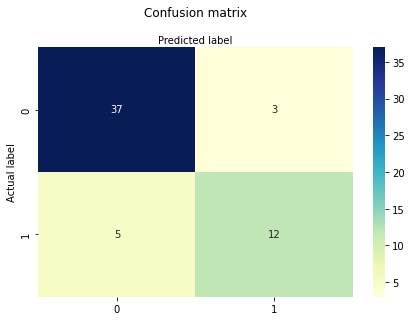

In [85]:
confusion_matrix(y_pred)

### Formulas to evaluate the model performance
- Precision = TP/(TP + FP)
- Recall = TP/(TP+FN)
- Accuracy = T/(T+F)
- F1 = 2*(Recall * Precision)/(Recall + Presision)


In [86]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.8
Recall: 0.7058823529411765
Accuracy: 0.8596491228070176
F1-Measure: 0.7500000000000001
Roc-AUC: 0.8154411764705883


In [87]:
logreg.score(X_train,y_train)

0.7575757575757576

## b- SVM (Support Vector Machine)

In [88]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

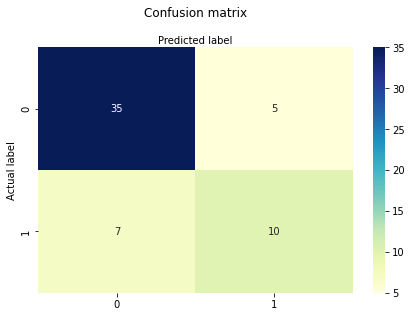

In [89]:
confusion_matrix(y_pred)

In [90]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.6666666666666666
Recall: 0.5882352941176471
Accuracy: 0.7894736842105263
F1-Measure: 0.625
Roc-AUC: 0.7316176470588236


## c- KNN (K-Nearest Neighbors)

In [91]:
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

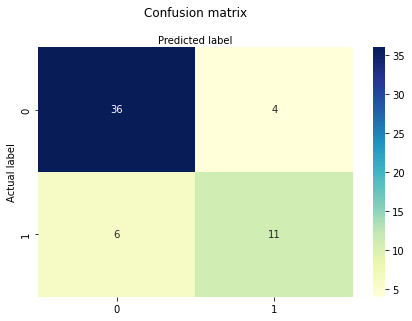

In [92]:
confusion_matrix(y_pred)

In [93]:
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.7333333333333333
Recall: 0.6470588235294118
Accuracy: 0.8245614035087719
F1-Measure: 0.6875
Roc-AUC: 0.7735294117647059


# - Cross Validation

In [94]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg, X_train, y_train, cv=stratifiedkf, scoring='accuracy')
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.7037037  0.7037037  0.53846154 0.69230769 0.73076923]
Average Cross Validation score :0.6737891737891738


# - GridSearchCV
### a- Logistic Regression

In [95]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [96]:
import time
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression(penalty='l2')
grid = GridSearchCV(estimator=lr, param_grid=param_grid, cv = 3, n_jobs=-1)

start_time = time.time()
grid_result = grid.fit(X_train, y_train)
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Execution time: " + str((time.time() - start_time)) + ' ms')

Best: 0.704545 using {'C': 1.0, 'dual': False, 'max_iter': 100}
Execution time: 3.345546007156372 ms


C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\lenovo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packa

In [97]:
model_LR = grid_result.best_estimator_
y_pred=model_LR.predict(X_test)
#print("Accuracy_score :",model_LR.score(X_test, y_test))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

Precision: 0.75
Recall: 0.7058823529411765
Accuracy: 0.8421052631578947
F1-Measure: 0.7272727272727272
Roc-AUC: 0.8029411764705883


### b- Support Vector Machine

In [98]:
# defining parameter range
param_grid_SVM = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

In [99]:
grid_SVM = GridSearchCV(clf, param_grid = param_grid_SVM, cv = 2, verbose=True, n_jobs=-1) # cv = Cross Validation

grid_SVM.fit(X_train,y_train)

Fitting 2 folds for each of 50 candidates, totalling 100 fits


GridSearchCV(cv=2, estimator=SVC(kernel='linear'), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=True)

In [100]:
# print best parameter after tuning
print("Best score: %f using %s" % (grid_SVM.best_score_, grid_SVM.best_params_))
 
y_pred=grid_SVM.predict(X_test)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))

# print how our model looks after hyper-parameter tuning
#print("Accuracy_score :",grid_SVM.best_estimator_.score(X_test, y_test))

Best score: 0.734848 using {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Precision: 0.631578947368421
Recall: 0.7058823529411765
Accuracy: 0.7894736842105263
F1-Measure: 0.6666666666666667
Roc-AUC: 0.7654411764705883


### c- KNN

In [101]:
param_grid_KNN = {'n_neighbors': np.arange(1, 20),
                  'metric': ['euclidean', 'manhattan']}

In [102]:
grid_KNN = GridSearchCV(knn, param_grid = param_grid_KNN, cv = 5, verbose=True) # cv = Cross Validation
grid_KNN.fit(X_train,y_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             verbose=True)

In [103]:
print(grid_KNN.best_params_)

{'metric': 'euclidean', 'n_neighbors': 11}


In [104]:
knn = grid_KNN.best_estimator_

y_pred=knn.predict(X_test)
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("F1-Measure:",metrics.f1_score(y_test, y_pred))
print("Roc-AUC:",metrics.roc_auc_score(y_test, y_pred))
#print("Accuracy_score :",knn.score(X_test, y_test))

Precision: 0.8333333333333334
Recall: 0.29411764705882354
Accuracy: 0.7719298245614035
F1-Measure: 0.4347826086956522
Roc-AUC: 0.6345588235294117
